In [4]:
import epochs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
%matplotlib inline

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [5]:
picture_size = 48     # in pixel 48x48 pixel
folder_path = "D:/final year/archive/images"

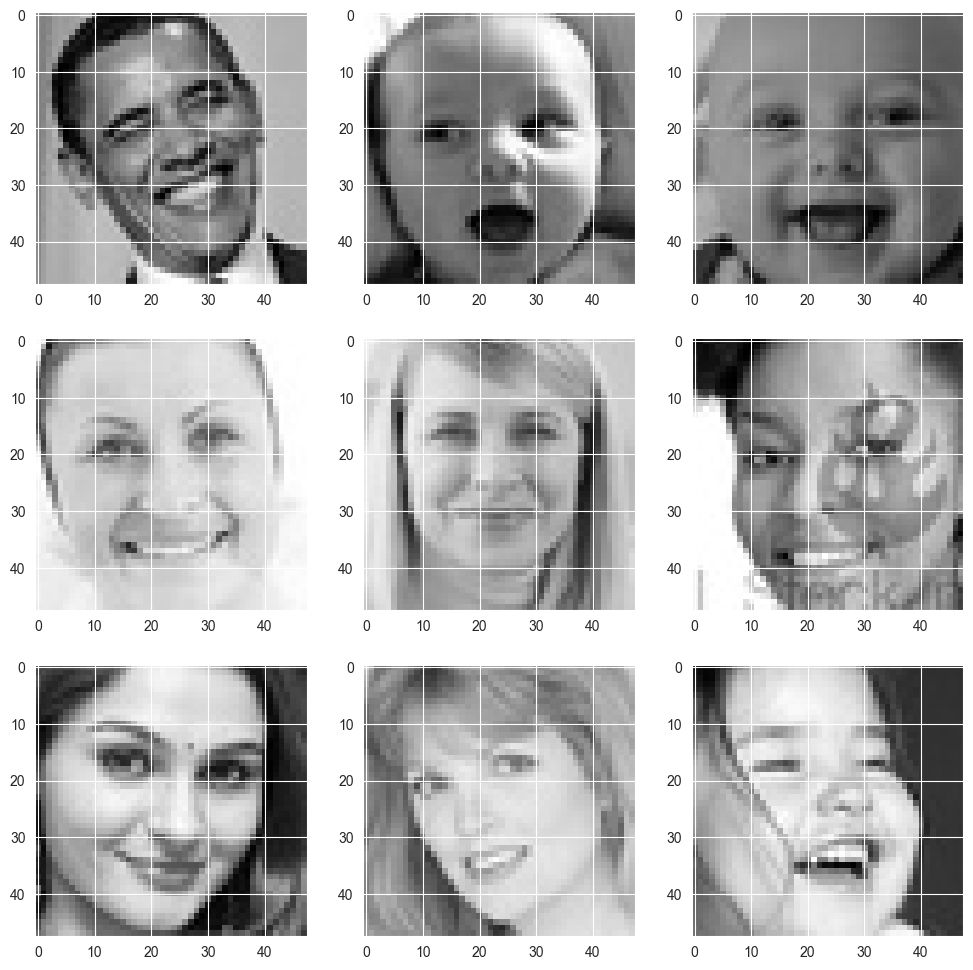

In [6]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/train/"+expression+"/"+
                  os.listdir(folder_path + "/train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

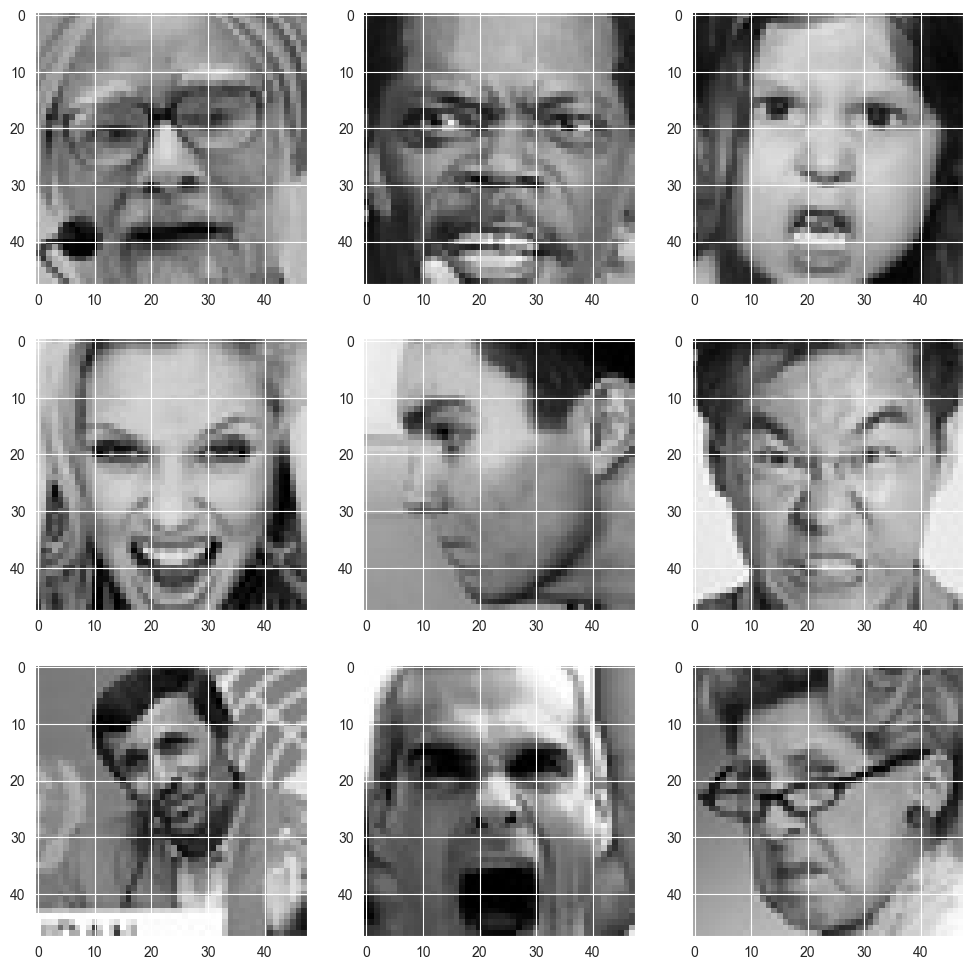

In [7]:
expression = 'angry'
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"/train/"+expression+"/"+
                  os.listdir(folder_path + "/train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [8]:
batch_size  = 64

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"/train/",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical')

test_set = datagen_val.flow_from_directory( folder_path+"/validation/",
                                            target_size = (picture_size,picture_size),
                                            color_mode = "grayscale",
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [9]:
no_of_classes=7

model=Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#2nd CNN layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#5th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [11]:
model_info = model.fit_generator(
    train_set,
    steps_per_epoch = 28821//64,
    epochs = 45,
    validation_data = test_set,
    validation_steps = 7066//64
)

C:\Users\uditr\AppData\Local\Temp\ipykernel_25360\3760835671.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_info = model.fit_generator(


Epoch 1/45
450/450 [==============================] - 695s 2s/step - loss: 1.8070 - accuracy: 0.2983 - val_loss: 1.7612 - val_accuracy: 0.3544
Epoch 2/45
450/450 [==============================] - 473s 1s/step - loss: 1.4313 - accuracy: 0.4503 - val_loss: 1.7754 - val_accuracy: 0.2527
Epoch 3/45
450/450 [==============================] - 461s 1s/step - loss: 1.2877 - accuracy: 0.5046 - val_loss: 1.1841 - val_accuracy: 0.5496
Epoch 4/45
450/450 [==============================] - 455s 1s/step - loss: 1.2053 - accuracy: 0.5428 - val_loss: 1.1679 - val_accuracy: 0.5641
Epoch 5/45
450/450 [==============================] - 437s 972ms/step - loss: 1.1472 - accuracy: 0.5643 - val_loss: 1.1258 - val_accuracy: 0.5722
Epoch 6/45
450/450 [==============================] - 438s 973ms/step - loss: 1.0970 - accuracy: 0.5841 - val_loss: 1.2037 - val_accuracy: 0.5548
Epoch 7/45
450/450 [==============================] - 440s 978ms/step - loss: 1.0566 - accuracy: 0.5976 - val_loss: 1.3912 - val_accurac

In [12]:
#Saving the Model Structure in JSON file:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)

#Save trained model weights in .h5 file:
model.save_weights("new_model.h5")